This notebook is part of the final project for Laura Brooks 501146410 in CIND 820

Notebook will be used to evaluate Airbnb data

In [72]:
import pandas as pd

#https://public.opendatasoft.com/explore/dataset/airbnb-listings/table/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features

df = pd.read_json('airbnb-listings.json')


In [127]:
pd.set_option('display.max_columns', None) #required to show all columns when using head()
pd.set_option('display.max_rows', None)

In [128]:
print("rows:",df.shape[0]) #display number of rows in entire dataset
print("columns:",df.shape[1]) #display number of cols in entire dataset


rows: 494954
columns: 89


In [170]:
dfTor = df.loc[df['city'] == 'Toronto'] 

In [171]:
#Keep only Toronto in dataset
dfTor = df.loc[df['city'] == 'Toronto'] 

print("rows:",dfTor.shape[0]) #display number of rows in reduced dataset
print("columns:",dfTor.shape[1]) #display number of cols in reduced dataset

dfTor.head()

rows: 12624
columns: 89


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,cancellation_policy,calculated_host_listings_count,reviews_per_month,geolocation,features
5112,17016247,https://www.airbnb.com/rooms/17016247,20170603080828,2017-06-03,2BR in trendy FASHION DISTRICT,My place is located in a very centrally and co...,None,My place is located in a very centrally and co...,none,None,None,None,None,None,None,https://a0.muscache.com/im/pictures/cc957c1d-9...,https://a0.muscache.com/im/pictures/cc957c1d-9...,"{'thumbnail': True, 'filename': 'cc957c1d-99b1...",https://a0.muscache.com/im/pictures/cc957c1d-9...,86295816,https://www.airbnb.com/users/show/86295816,Sofia,2016-07-27,CA,None,within an hour,100.0,None,https://a0.muscache.com/im/pictures/8e094252-5...,https://a0.muscache.com/im/pictures/8e094252-5...,Entertainment District,9.0,9.0,"[email, phone, reviews]","Toronto, ON M6J, Canada",None,Niagara,None,Toronto,ON,M6J,Toronto,"Toronto, Canada",CA,Canada,43.646031,-79.404524,Condominium,Entire home/apt,5.0,2.0,2.0,2.0,Real Bed,"[TV, Cable TV, Internet, Wireless Internet, Ai...",NaN,178.0,NaN,NaN,400.0,75.0,3.0,20.0,3.0,60.0,a week ago,None,5.0,16.0,39.0,39.0,2017-06-03,10.0,2017-02-20,2017-05-07,92.0,9.0,10.0,9.0,9.0,9.0,9.0,None,None,strict,9.0,2.88,"{'lon': -79.40452446292299, 'lat': 43.64603146...",[Host Has Profile Pic]
5113,14828409,https://www.airbnb.com/rooms/14828409,20170603080828,2017-06-03,Beautiful loft in the heart of T.O,Beautiful loft for rent.. Animals welcome.. Hu...,None,Beautiful loft for rent.. Animals welcome.. Hu...,none,The Rogers centre.. Yonge street and shopping ...,1200 channels... Sports/movies/smart tv.,None,None,None,Guests must enjoy.,None,None,"{'thumbnail': True, 'filename': '4bef6718-adc8...",None,18209134,https://www.airbnb.com/users/show/18209134,Rhonda,2014-07-16,"Toronto, Ontario, Canada",None,a few days or more,0.0,None,https://a0.muscache.com/im/pictures/89c318c1-c...,https://a0.muscache.com/im/pictures/89c318c1-c...,None,1.0,1.0,"[email, phone, facebook, google, jumio, govern...","Toronto, ON M5V 3J6, Canada",None,Niagara,None,Toronto,ON,M5V 3J6,Toronto,"Toronto, Canada",CA,Canada,43.636088,-79.402124,Apartment,Entire home/apt,3.0,1.0,1.0,1.0,Real Bed,"[TV, Internet, Wireless Internet, Air conditio...",NaN,250.0,NaN,NaN,200.0,100.0,1.0,0.0,29.0,1125.0,9 months ago,None,29.0,59.0,89.0,364.0,2017-06-03,0.0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,flexible,1.0,NaN,"{'lon': -79.40212413174619, 'lat': 43.63608785...","[Host Has Profile Pic, Host Identity Verified]"
5114,3423261,https://www.airbnb.com/rooms/3423261,20170603080828,2017-06-03,GORGEOUS DOWNTOWN KING WEST LOFT,My chic and modern one bedroom apartment is ri...,"Spacious, open concept loft. Includes laundry,...",My chic and modern one bedroom apartment is ri...,none,The King West neighborhood is the most popular...,None,There is transit at the do

In [172]:
#Drop ID columns

droppedCols = []

idCols = ["id","scrape_id","host_id"]
droppedCols.extend(idCols)
dfTor = dfTor.drop(idCols, axis=1)

URLCols = ["listing_url","thumbnail_url","medium_url","picture_url","xl_picture_url","host_url","host_thumbnail_url","host_picture_url"]
droppedCols.extend(URLCols)
dfTor = dfTor.drop(URLCols, axis=1)



print(droppedCols)


['id', 'scrape_id', 'host_id', 'listing_url', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url']


In [173]:
fullNaN = []
majorityNaN = []

for col in dfTor.columns:
    nan_count = dfTor[col].isna().sum()
    percentNaN = nan_count/dfTor.shape[0]*100
    if percentNaN == 100:
        fullNaN.append(col)
    elif percentNaN > 60:
        majorityNaN.append(col)

droppedCols.extend(fullNaN)
dfTor = dfTor.drop(fullNaN, axis=1)
droppedCols.extend(majorityNaN)
dfTor = dfTor.drop(majorityNaN, axis=1)

In [174]:
print(dfTor.dtypes)

last_scraped                       object
name                               object
summary                            object
space                              object
description                        object
experiences_offered                object
neighborhood_overview              object
notes                              object
transit                            object
access                             object
interaction                        object
house_rules                        object
host_name                          object
host_since                         object
host_location                      object
host_about                         object
host_response_time                 object
host_response_rate                float64
host_neighbourhood                 object
host_listings_count               float64
host_total_listings_count         float64
host_verifications                 object
street                             object
neighbourhood                     

In [176]:

colsDict = []
colsList = []
colsNum = []
colsRemaining = []


for col in dfTor.columns:
    if isinstance(df[col][0],dict):
        colsDict.append(col)
    elif isinstance(df[col][0],list):
        colsList.append(col)
    elif dfTor[col].nunique() == 1: #Check if column only has one unique value
        #If yes, drop the column
        print("Dropping column:", col, "- Only 1 value in Column")
        dfTor = dfTor.drop(col, axis=1)
        droppedCols.append(col)
    elif dfTor[col].dtype.kind in ['i', 'f']:
         colsNum.append(col)
    else:
        colsRemaining.append(col)
         
print(dfTor['state'].unique())
print(dfTor['market'].unique())
print(dfTor['smart_location'].unique())

droppedCols.extend(['state','market','smart_location'])
dfTor = dfTor.drop(['state','market','smart_location'], axis=1)

['ON' 'Ontario' '1' 'On' 'Ont']
['Toronto' None 'Other (International)' 'Paris' 'Montreal' 'Boracay'
 'Barrie']
['Toronto, Canada' 'Toronto , Canada']


In [178]:
print(colsNum)

['host_response_rate', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month']


In [179]:
#investigate dictionaries
for col in colsDict:
    print(col)
    for i in range(0,6):
        print(dfTor[col].iloc[i])

print(dfTor['geolocation'].iloc[0])
print(dfTor['longitude'].iloc[0])
print(dfTor['latitude'].iloc[0])

#drop picture_url as it just lists metadata of a single picture
#drop geolocation as it is the combination of the longitude and latitude fields

for col in colsDict:
    print("Dropping column:", col, "- Dictionary does not add value")
    dfTor = dfTor.drop(col, axis=1)
    droppedCols.append(col)

print("Total Columns Dropped:", len(droppedCols))

geolocation
{'lon': -79.40452446292299, 'lat': 43.64603146761254}
{'lon': -79.40212413174619, 'lat': 43.6360878541109}
{'lon': -79.41325061425616, 'lat': 43.641340461522496}
{'lon': -79.39973536528566, 'lat': 43.63664823849674}
{'lon': -79.41456998953726, 'lat': 43.63966507804839}
{'lon': -79.41672354925157, 'lat': 43.641848524708514}
{'lon': -79.40452446292299, 'lat': 43.64603146761254}
-79.40452446292299
43.64603146761254
Dropping column: geolocation - Dictionary does not add value
Total Columns Dropped: 29


In [180]:
#investigate list
for col in colsList:
    print(col)




host_verifications
amenities
features


In [181]:
host_verificationsCL = []
for sublist in dfTor['host_verifications']:
    if sublist is not None:
        host_verificationsCL.extend(sublist)
host_verificationsCL = list(dict.fromkeys(host_verificationsCL))
print("Host Verifications:", len(host_verificationsCL))
print(host_verificationsCL)

featuresCL = []
for sublist in dfTor['features']:
    if sublist is not None:
        featuresCL.extend(sublist)
featuresCL = list(dict.fromkeys(featuresCL))
print("Features:", len(featuresCL))
print(featuresCL)

amenitiesCL = []
for sublist in dfTor['amenities']:
    if sublist is not None:
        amenitiesCL.extend(sublist)
amenitiesCL = list(dict.fromkeys(amenitiesCL))
print("Amenitities:", len(amenitiesCL))
print(amenitiesCL)

Host Verifications: 22
['email', 'phone', 'reviews', 'facebook', 'google', 'jumio', 'government_id', 'offline_government_id', 'work_email', 'linkedin', 'selfie', 'identity_manual', 'manual_offline', 'sent_id', 'weibo', 'kba', 'manual_online', 'photographer', 'sesame', 'sesame_offline', 'None', 'amex']
Features: 7
['Host Has Profile Pic', 'Host Identity Verified', 'Is Location Exact', 'Host Is Superhost', 'Instant Bookable', 'Require Guest Phone Verification', 'Require Guest Profile Picture']
Amenitities: 108
['TV', 'Cable TV', 'Internet', 'Wireless Internet', 'Air conditioning', 'Kitchen', 'Elevator in building', 'Heating', 'Washer', 'Dryer', 'Smoke detector', 'Carbon monoxide detector', 'Fire extinguisher', 'Essentials', 'Shampoo', 'Lock on bedroom door', 'Hangers', 'Hair dryer', 'Iron', 'Private entrance', 'Wheelchair accessible', 'Free parking on premises', 'Smoking allowed', 'Pets allowed', 'Gym', 'Hot tub', 'Family/kid friendly', 'Suitable for events', 'First aid kit', '24-hour ch

In [182]:
print(len(droppedCols))
print(dfTor.shape[1])
print(len(colsNum))

29
60
30


In [183]:
dfTor[colsNum].describe() # Display summary statistics


,host_response_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,10080.000000,12623.000000,12623.000000,12624.000000,12624.000000,12624.000000,12602.000000,12617.000000,12603.000000,12579.000000,6873.000000,9054.000000,12624.000000,12624.00000,12624.000000,1.262400e+04,12624.000000,12624.000000,12624.000000,12624.000000,12624.000000,9704.000000,9684.000000,9688.000000,9667.000000,9688.000000,9660.000000,9662.000000,12624.000000,9831.000000
mean,93.994940,3.968074,3.968074,43.674389,-79.397421,2.954769,1.228218,1.267972,1.605015,118.727562,309.078568,52.609123,1.543409,11.58872,9.059965,5.906554e+05,8.350444,20.690589,35.340779,155.764734,16.053390,94.018858,9.611524,9.409063,9.756388,9.767547,9.637267,9.492134,3.118901,1.746531
std,17.010682,13.670333,13.670333,0.042803,0.057739,1.807525,0.528352,0.802806,1.026848,93.847366,166.475826,39.845581,1.118369,21.19914,536.823958,3.427671e+07,10.213353,21.211014,32.332805,135.887753,28.920519,8.190806,0.799705,0.983496,0.663345,0.677509,0.713773,0.847367,5.850365,2.035940
min,0.000000,0.000000,0.000000,43.586713,-79.622861,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,100.000000,1.000000,1.000000,43.645515,-79.424345,2.000000,1.000000,1.000000,1.000000,59.000000,200.000000,25.000000,1.000000,0.00000,1.000000,6.000000e+01,0.000000,0.000000,0.000000,18.000000,1.000000,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.360000
50%,100.000000,1.000000,1.000000,43.660884,-79.398526,2.000000,1.000000,1.000000,1.000000,95.000000,250.000000,49.000000,1.000000,0.00000,2.000000,1.125000e+03,3.000000,13.000000,29.000000,122.000000,5.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000
75%,100.000000,3.000000,3.000000,43.683053,-79.377433,4.000000,1.000000,1.000000,2.000000,149.000000,450.000000,70.000000,2.000000,20.00000,3.000000,1.125000e+03,14.000000,37.000000,63.000000,296.000000,18.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,2.340000
max,100.000000,553.000000,553.000000,43.827784,-79.128646,16.000000,8.000000,10.000000,13.000000,999.000000,999.000000,680.000000,16.000000,568.00000,60000.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,452.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,57.000000,18.180000


In [184]:
#dfTor[["host_response_rate","host_listings_count","host_total_listings_count","latitude","longitude"]].describe()
#dfTor[["accommodates","bathrooms","bedrooms","beds","price"]].describe()
#dfTor[["security_deposit","cleaning_fee","guests_included","extra_people","minimum_nights"]].describe()
#dfTor[["maximum_nights","availability_30","availability_60","availability_90","availability_365"]].describe()
#dfTor[["number_of_reviews","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin"]].describe()
#dfTor[["review_scores_communication","review_scores_location","review_scores_value","calculated_host_listings_count","reviews_per_month"]].describe()

In [185]:
dfTorNonNum = dfTor.drop(colsNum, axis=1)
dfTorNonNum.head()

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_name,host_since,host_location,host_about,host_response_time,host_neighbourhood,host_verifications,street,neighbourhood,neighbourhood_cleansed,zipcode,property_type,room_type,bed_type,amenities,calendar_updated,first_review,last_review,cancellation_policy,features
5112,2BR in trendy FASHION DISTRICT,My place is located in a very centrally and co...,None,My place is located in a very centrally and co...,None,None,None,None,None,None,Sofia,2016-07-27,CA,None,within an hour,Entertainment District,"[email, phone, reviews]","Toronto, ON M6J, Canada",None,Niagara,M6J,Condominium,Entire home/apt,Real Bed,"[TV, Cable TV, Internet, Wireless Internet, Ai...",a week ago,2017-02-20,2017-05-07,strict,[Host Has Profile Pic]
5113,Beautiful loft in the heart of T.O,Beautiful loft for rent.. Animals welcome.. Hu...,None,Beautiful loft for rent.. Animals welcome.. Hu...,The Rogers centre.. Yonge street and shopping ...,1200 channels... Sports/movies/smart tv.,None,None,None,Guests must enjoy.,Rhonda,2014-07-16,"Toronto, Ontario, Canada",None,a few days or more,None,"[email, phone, facebook, google, jumio, govern...","Toronto, ON M5V 3J6, Canada",None,Niagara,M5V 3J6,Apartment,Entire home/apt,Real Bed,"[TV, Internet, Wireless Internet, Air conditio...",9 months ago,None,None,flexible,"[Host Has Profile Pic, Host Identity Verified]"
5114,GORGEOUS DOWNTOWN KING WEST LOFT,My chic and modern one bedroom apartment is ri...,"Spacious, open concept loft. Includes laundry,...",My chic and modern one bedroom apartment is ri...,The King West neighborhood is the most popular...,None,There is transit at the doorstep of the buildi...,"Gym in the building, as well as parking if des...",None,None,Devin,2014-05-03,"Toronto, Ontario, Canada",Young working professional determined to see a...,within a day,Niagara,"[email, phone, reviews, jumio]","Niagara, Toronto, ON M6K 0A1, Canada",Niagara,Niagara,M6K 0A1,Loft,Entire home/apt,Real Bed,"[TV, Internet, Wireless Internet, Air conditio...",yesterday,2014-09-01,2016-11-27,flexible,"[Host Has Profile Pic, Host Identity Verified,..."
5115,Private Bedroom in Beautiful Condo,"Stay in the heart of downtown. Spacious condo,...",None,"Stay in the heart of downtown. Spacious condo,...",None,None,None,None,None,"- Music low after 11 (Neighbors are cool, we'r...",Michael,2015-12-04,Canada,I'm a 26 year old young professional who moved...,a few days or more,Niagara,"[email, phone, google, jumio, offline_governme...","Niagara, Toronto, ON M5V 0G8, Canada",Niagara,Niagara,M5V 0G8,Condominium,Private room,Real Bed,"[Cable TV, Internet, Wireless Internet, Air co...",2 months ago,None,None,strict,"[Host Has Profile Pic, Host Identity Verified,..."
5116,Chic 2 Storey loft- Liberty Village,"Located in the heart of Liberty Village, my fu...",Located in Downtown Toronto this loft boats st...,"Located in the heart of Liberty Village, my fu...",Conveniently located steps from a 24 grocery s...,If you are looking for a place to feel comfort...,The local bus can be accessed just across the ...,You will have access to the entire space and i...,I will make myself accessible to you via phone...,Absolutely no smoking or parties please! If yo...,Romana,2014-04-12,"Toronto, Ontario, Canada",None,within a day,Niagara,"[email, phone, reviews]","Niagara, Toronto, ON M6K 3S2, Canada",Niagara,Niagara,M6K 3S2,Loft,Entire home/apt,Real Bed,"[TV, Wireless Internet, Air conditioning, Kitc...",5 days ago,2015-02-17,2017-04-18,flexible,"[Host Has Profile Pic, Is Location Exact]"


In [192]:
catCols = ["host_response_time","host_neighbourhood","neighbourhood","neighbourhood_cleansed","property_type","room_type","bed_type","cancellation_policy"]
print(len(catCols))
for col in catCols:
    print(col,dfTor[col].nunique()) #Check if column only has one unique value
    if dfTor[col].nunique() <= 20:
        print(dfTor[col].unique())
 
dfTor[catCols] = dfTor[catCols].astype("category")



8
host_response_time 4
['within an hour' 'a few days or more' 'within a day' 'within a few hours'
 None]
host_neighbourhood 166
neighbourhood 140
neighbourhood_cleansed 139
property_type 21
room_type 3
['Entire home/apt' 'Private room' 'Shared room']
bed_type 5
['Real Bed' 'Futon' 'Couch' 'Pull-out Sofa' 'Airbed']
cancellation_policy 4
['strict' 'flexible' 'moderate' 'super_strict_60']


<Axes: >

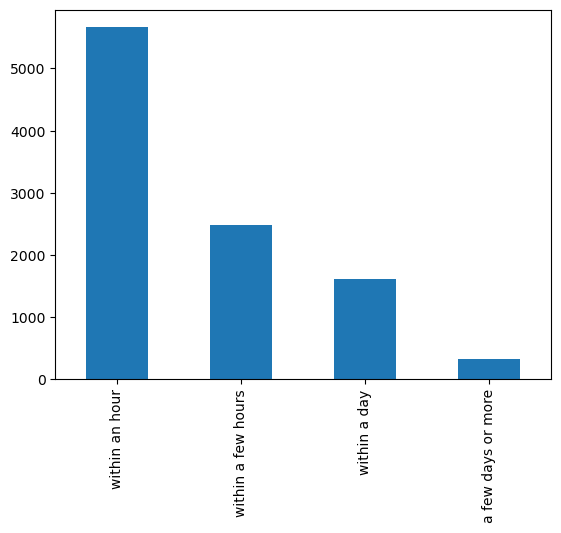

In [194]:
dfTor['host_response_time'].value_counts().plot(kind='bar')

<Axes: >

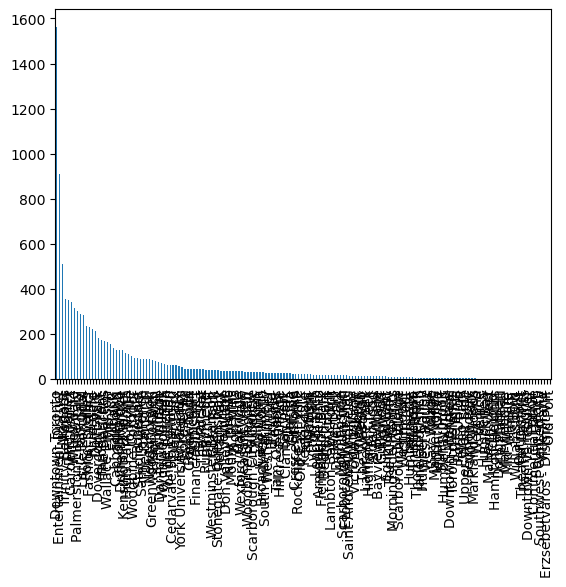

In [198]:
dfTor['host_neighbourhood'].value_counts().plot(kind='bar')

<Axes: >

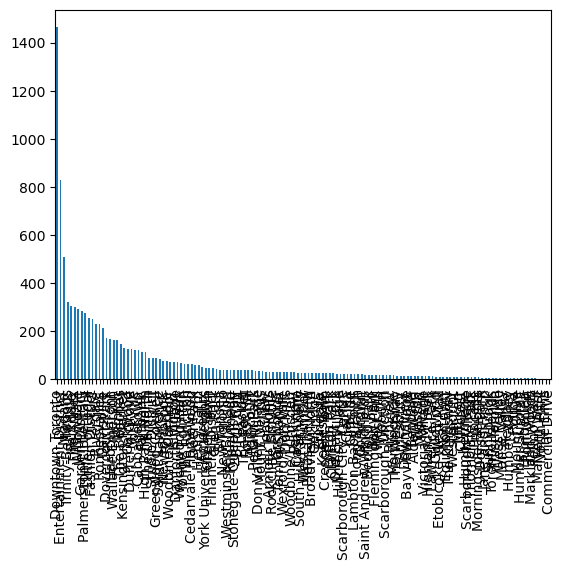

In [199]:
dfTor['neighbourhood'].value_counts().plot(kind='bar')

<Axes: >

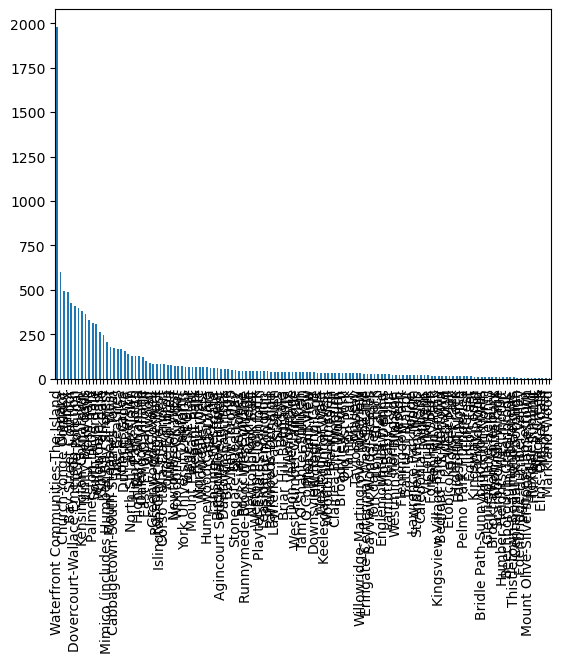

In [200]:
dfTor['neighbourhood_cleansed'].value_counts().plot(kind='bar')

<Axes: >

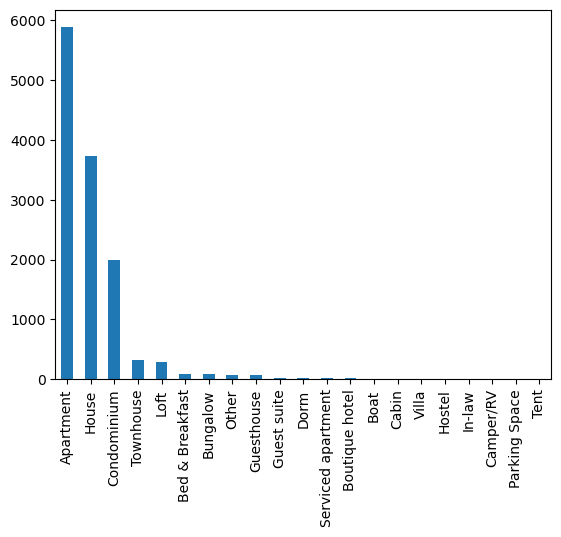

In [201]:
dfTor['property_type'].value_counts().plot(kind='bar')

<Axes: >

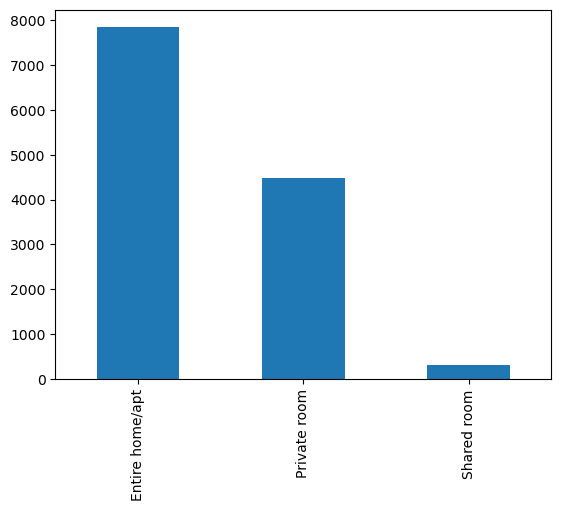

In [195]:
dfTor['room_type'].value_counts().plot(kind='bar')

<Axes: >

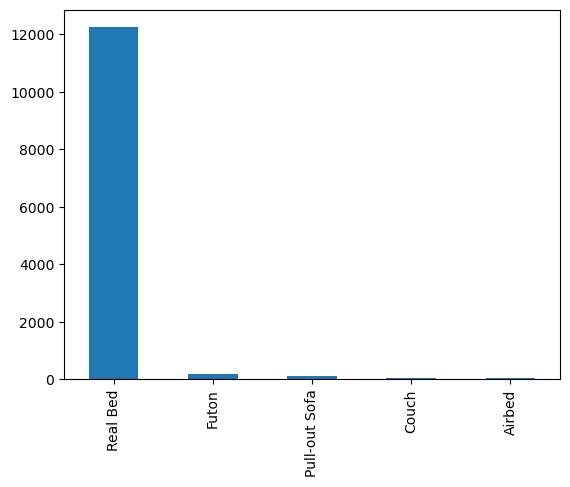

In [196]:
dfTor['bed_type'].value_counts().plot(kind='bar')

<Axes: >

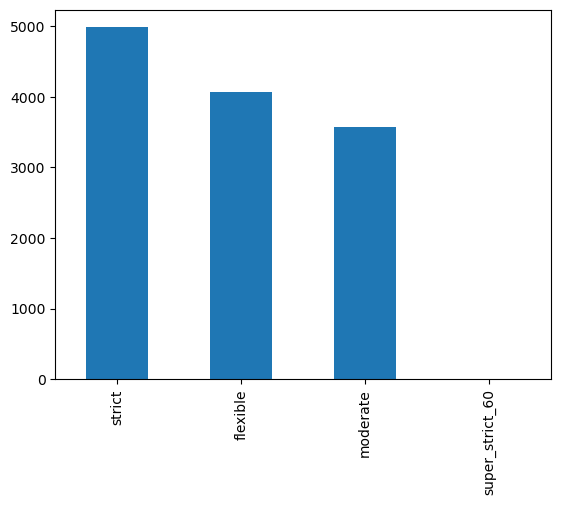

In [197]:
dfTor['cancellation_policy'].value_counts().plot(kind='bar')

In [187]:
dfTorNonNum = dfTor.drop(colsNum, axis=1)
dfTorNonNum.head()

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_name,host_since,host_location,host_about,host_response_time,host_neighbourhood,host_verifications,street,neighbourhood,neighbourhood_cleansed,zipcode,property_type,room_type,bed_type,amenities,calendar_updated,first_review,last_review,cancellation_policy,features
5112,2BR in trendy FASHION DISTRICT,My place is located in a very centrally and co...,None,My place is located in a very centrally and co...,None,None,None,None,None,None,Sofia,2016-07-27,CA,None,within an hour,Entertainment District,"[email, phone, reviews]","Toronto, ON M6J, Canada",None,Niagara,M6J,Condominium,Entire home/apt,Real Bed,"[TV, Cable TV, Internet, Wireless Internet, Ai...",a week ago,2017-02-20,2017-05-07,strict,[Host Has Profile Pic]
5113,Beautiful loft in the heart of T.O,Beautiful loft for rent.. Animals welcome.. Hu...,None,Beautiful loft for rent.. Animals welcome.. Hu...,The Rogers centre.. Yonge street and shopping ...,1200 channels... Sports/movies/smart tv.,None,None,None,Guests must enjoy.,Rhonda,2014-07-16,"Toronto, Ontario, Canada",None,a few days or more,None,"[email, phone, facebook, google, jumio, govern...","Toronto, ON M5V 3J6, Canada",None,Niagara,M5V 3J6,Apartment,Entire home/apt,Real Bed,"[TV, Internet, Wireless Internet, Air conditio...",9 months ago,None,None,flexible,"[Host Has Profile Pic, Host Identity Verified]"
5114,GORGEOUS DOWNTOWN KING WEST LOFT,My chic and modern one bedroom apartment is ri...,"Spacious, open concept loft. Includes laundry,...",My chic and modern one bedroom apartment is ri...,The King West neighborhood is the most popular...,None,There is transit at the doorstep of the buildi...,"Gym in the building, as well as parking if des...",None,None,Devin,2014-05-03,"Toronto, Ontario, Canada",Young working professional determined to see a...,within a day,Niagara,"[email, phone, reviews, jumio]","Niagara, Toronto, ON M6K 0A1, Canada",Niagara,Niagara,M6K 0A1,Loft,Entire home/apt,Real Bed,"[TV, Internet, Wireless Internet, Air conditio...",yesterday,2014-09-01,2016-11-27,flexible,"[Host Has Profile Pic, Host Identity Verified,..."
5115,Private Bedroom in Beautiful Condo,"Stay in the heart of downtown. Spacious condo,...",None,"Stay in the heart of downtown. Spacious condo,...",None,None,None,None,None,"- Music low after 11 (Neighbors are cool, we'r...",Michael,2015-12-04,Canada,I'm a 26 year old young professional who moved...,a few days or more,Niagara,"[email, phone, google, jumio, offline_governme...","Niagara, Toronto, ON M5V 0G8, Canada",Niagara,Niagara,M5V 0G8,Condominium,Private room,Real Bed,"[Cable TV, Internet, Wireless Internet, Air co...",2 months ago,None,None,strict,"[Host Has Profile Pic, Host Identity Verified,..."
5116,Chic 2 Storey loft- Liberty Village,"Located in the heart of Liberty Village, my fu...",Located in Downtown Toronto this loft boats st...,"Located in the heart of Liberty Village, my fu...",Conveniently located steps from a 24 grocery s...,If you are looking for a place to feel comfort...,The local bus can be accessed just across the ...,You will have access to the entire space and i...,I will make myself accessible to you via phone...,Absolutely no smoking or parties please! If yo...,Romana,2014-04-12,"Toronto, Ontario, Canada",None,within a day,Niagara,"[email, phone, reviews]","Niagara, Toronto, ON M6K 3S2, Canada",Niagara,Niagara,M6K 3S2,Loft,Entire home/apt,Real Bed,"[TV, Wireless Internet, Air conditioning, Kitc...",5 days ago,2015-02-17,2017-04-18,flexible,"[Host Has Profile Pic, Is Location Exact]"


In [188]:
for col in dfTor.columns:
    print(col)

len(dfTor.columns)

name
summary
space
description
neighborhood_overview
notes
transit
access
interaction
house_rules
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
street
neighbourhood
neighbourhood_cleansed
zipcode
latitude
longitude
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
calendar_updated
availability_30
availability_60
availability_90
availability_365
number_of_reviews
first_review
last_review
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
cancellation_policy
calculated_host_listings_count
reviews_per_month
features


60

In [189]:
for col in droppedCols:
    print(col)

len(droppedCols)

id
scrape_id
host_id
listing_url
thumbnail_url
medium_url
picture_url
xl_picture_url
host_url
host_thumbnail_url
host_picture_url
host_acceptance_rate
neighbourhood_group_cleansed
has_availability
license
jurisdiction_names
square_feet
weekly_price
monthly_price
last_scraped
experiences_offered
city
country_code
country
calendar_last_scraped
state
market
smart_location
geolocation


29

                                host_response_rate  host_listings_count  \
host_response_rate                        1.000000             0.016872   
host_listings_count                       0.016872             1.000000   
host_total_listings_count                 0.016872             1.000000   
latitude                                 -0.027135             0.027269   
longitude                                -0.011468             0.001188   
accommodates                              0.063749             0.049472   
bathrooms                                -0.004311             0.080158   
bedrooms                                  0.030672             0.030939   
beds                                      0.041340             0.036469   
price                                    -0.002576             0.037655   
security_deposit                          0.020957             0.044922   
cleaning_fee                              0.000855             0.039109   
guests_included          

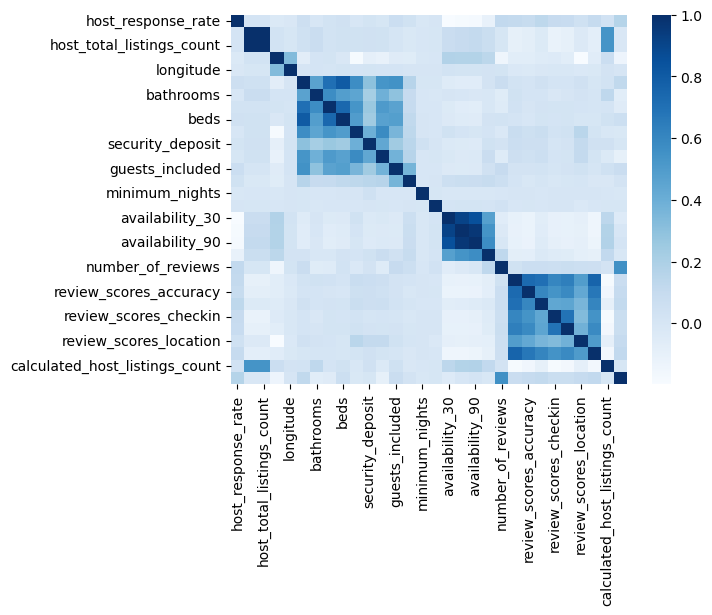

In [207]:
import seaborn as sb

dfNum =dfTor[colsNum]

corr = dfNum.corr()

sb.heatmap(corr, cmap="Blues", annot=False)

print(corr)